In [189]:
import pandas as pd
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt

In [176]:
inception_sent_path = "D:/ITU/DataintheWild/Project-Dec07/DITW_project-master/data/twitter/inception/inception_sentiment_date.csv"
mermaid_sent_path = "D:/ITU/DataintheWild/Project-Dec07/DITW_project-master/data/twitter/little_mermaid/little_mermaid_sentiment_date.csv"
witcher_sent_path = "D:/ITU/DataintheWild/Project-Dec07/DITW_project-master/data/twitter/thewitcher/thewitcher_sentiment_date.csv"
wallstreet_sent_path = "D:/ITU/DataintheWild/Project-Dec07/DITW_project-master/data/twitter/wolf_of_wall_street/wolf_of_wall_street_sentiment_date.csv"
bridge_sent_path = "D:/ITU/DataintheWild/Project-Dec07/DITW_project-master/data/twitter/bridgerton/bridgerton_sentiment_date.csv"
ghost_sent_path = "D:/ITU/DataintheWild/Project-Dec07/DITW_project-master/data/twitter/ghostintheshell/ghostintheshell_sentiment_date.csv"
mad_sent_path = "D:/ITU/DataintheWild/Project-Dec07/DITW_project-master/data/twitter/mad_max_fury_road/mad_max_fury_road_sentiment_date.csv"


In [197]:
df_bridgerton = pd.read_csv(bridge_sent_path, sep="\t")
df_inception = pd.read_csv(inception_sent_path, sep="\t")
df_littlemermaid = pd.read_csv(mermaid_sent_path, sep="\t")
df_madmax = pd.read_csv(mad_sent_path, sep="\t")
df_witcher = pd.read_csv(witcher_sent_path, sep="\t")
df_wallstreet = pd.read_csv(wallstreet_sent_path, sep="\t")

# Make another list of dataframes with positive, neutral and negative still as probabilities in case we want to use them later, specifically for standard deviation analysis
#df_bridgerton_per = df_bridgerton[["date", "negative", "neutral", "positive", "like_count", "quote_count", "reply_count",
#                                "retweet_count"]]
df_bridgerton_per = df_bridgerton[["negative", "neutral", "positive"]]
df_inception_per = df_inception[["date", "negative", "neutral", "positive", "like_count", "quote_count", "reply_count",
                                "retweet_count"]]
df_littlemermaid_per = df_littlemermaid[["date", "negative", "neutral", "positive", "like_count", "quote_count", "reply_count",
                                "retweet_count"]]
df_madmax_per = df_madmax[["date", "negative", "neutral", "positive", "like_count", "quote_count", "reply_count",
                                "retweet_count"]]
df_witcher_per = df_witcher[["date", "negative", "neutral", "positive", "like_count", "quote_count", "reply_count",
                                "retweet_count"]]
df_wallstreet_per = df_wallstreet[["date", "negative", "neutral", "positive", "like_count", "quote_count", "reply_count",
                                "retweet_count"]]

df_bridgerton_per

,negative,neutral,positive
0,0.0029,0.8931,0.1040
1,0.0092,0.9530,0.0378
2,0.7411,0.2405,0.0184
3,0.2104,0.7593,0.0303
4,0.9293,0.0653,0.0055
...,...,...,...
9993,0.0058,0.0348,0.9594
9994,0.0108,0.9498,0.0394
9995,0.4746,0.4627,0.0627
9996,0.5111,0.4213,0.0675


In [178]:
# Combine sentiment into one, instead of having three different values, and replace it instead with the one the model thinks is most likely to be
df_bridgerton["sentiment"] = df_bridgerton[["negative", "neutral", "positive"]].idxmax(axis=1)
df_bridgerton = df_bridgerton[["date", "sentiment", "like_count", "quote_count", "reply_count",
                                "retweet_count"]]

df_inception["sentiment"] = df_inception[["negative", "neutral", "positive"]].idxmax(axis=1)
df_inception = df_inception[["date", "sentiment", "like_count", "quote_count", "reply_count",
                                "retweet_count"]]

df_littlemermaid["sentiment"] = df_littlemermaid[["negative", "neutral", "positive"]].idxmax(axis=1)
df_littlemermaid = df_littlemermaid[["date", "sentiment", "like_count", "quote_count", "reply_count",
                                "retweet_count"]]

df_madmax["sentiment"] = df_madmax[["negative", "neutral", "positive"]].idxmax(axis=1)
df_madmax = df_madmax[["date", "sentiment", "like_count", "quote_count", "reply_count",
                                "retweet_count"]]

df_witcher["sentiment"] = df_witcher[["negative", "neutral", "positive"]].idxmax(axis=1)
df_witcher = df_witcher[["date", "sentiment", "like_count", "quote_count", "reply_count",
                                "retweet_count"]]

df_wallstreet["sentiment"] = df_wallstreet[["negative", "neutral", "positive"]].idxmax(axis=1)
df_wallstreet = df_wallstreet[["date", "sentiment", "like_count", "quote_count", "reply_count",
                                "retweet_count"]]

In [179]:
# Replace values for sentiment with numbers so we can use correlation on it.
replace_values = {'neutral': 0, 'positive': 1, 'negative': -1}

df_bridgerton_numb_sent = df_bridgerton.copy()
df_inception_numb_sent = df_inception.copy()
df_littlemermaid_numb_sent = df_littlemermaid.copy()
df_madmax_numb_sent = df_madmax.copy()
df_witcher_numb_sent = df_witcher.copy()
df_wallstreet_numb_sent = df_wallstreet.copy()

df_bridgerton_numb_sent['sentiment'] = df_bridgerton_numb_sent['sentiment'].replace(replace_values)
df_inception_numb_sent['sentiment'] = df_inception_numb_sent['sentiment'].replace(replace_values)
df_littlemermaid_numb_sent['sentiment'] = df_littlemermaid_numb_sent['sentiment'].replace(replace_values)
df_madmax_numb_sent['sentiment'] = df_madmax_numb_sent['sentiment'].replace(replace_values)
df_witcher_numb_sent['sentiment'] = df_witcher_numb_sent['sentiment'].replace(replace_values)
df_wallstreet_numb_sent['sentiment'] = df_wallstreet_numb_sent['sentiment'].replace(replace_values)

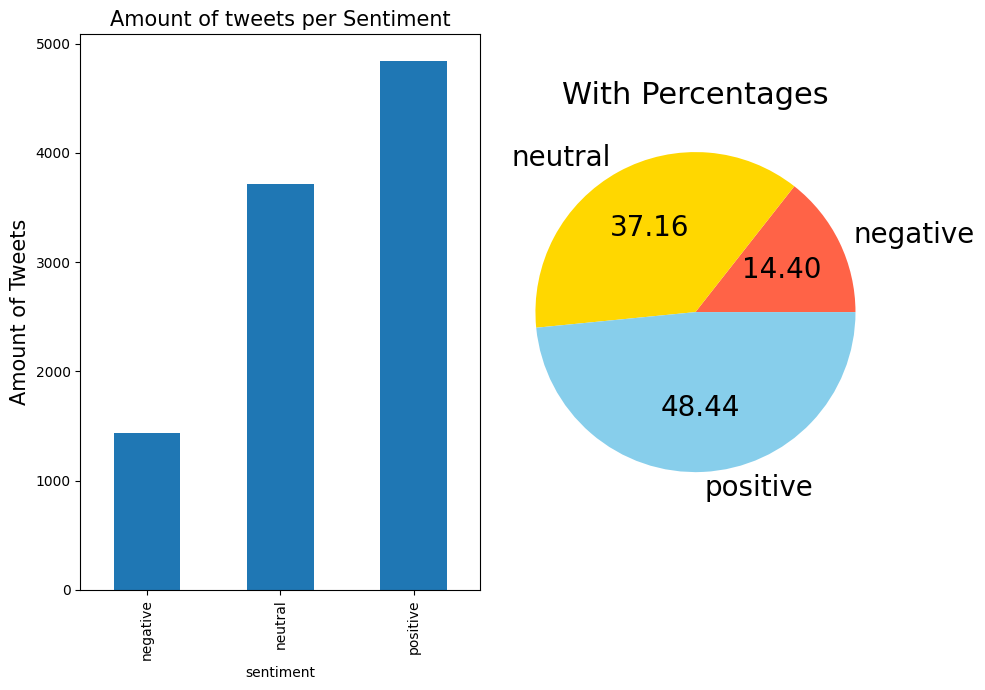

In [185]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(10, 7))

df_inception.groupby('sentiment').size().plot(kind='bar', ax=ax1)
df_inception.groupby('sentiment').size().plot(kind='pie', autopct='%.2f', textprops={'fontsize': 20},
                                  colors=['tomato', 'gold', 'skyblue'], ax=ax2)

ax1.set_ylabel('Amount of Tweets', size=15)
ax1.set_title('Amount of tweets per Sentiment', size=15)
ax2.set_title('With Percentages', size=22)
plt.tight_layout()
plt.show()



<AxesSubplot: >

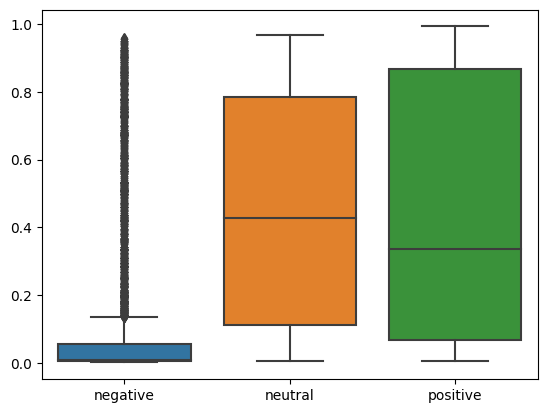

In [198]:
sns.boxplot(data=df_bridgerton_per)


C:\Users\nicob\AppData\Local\Temp\ipykernel_12736\255293339.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corrMatrix = df_bridgerton_numb_sent.corr()


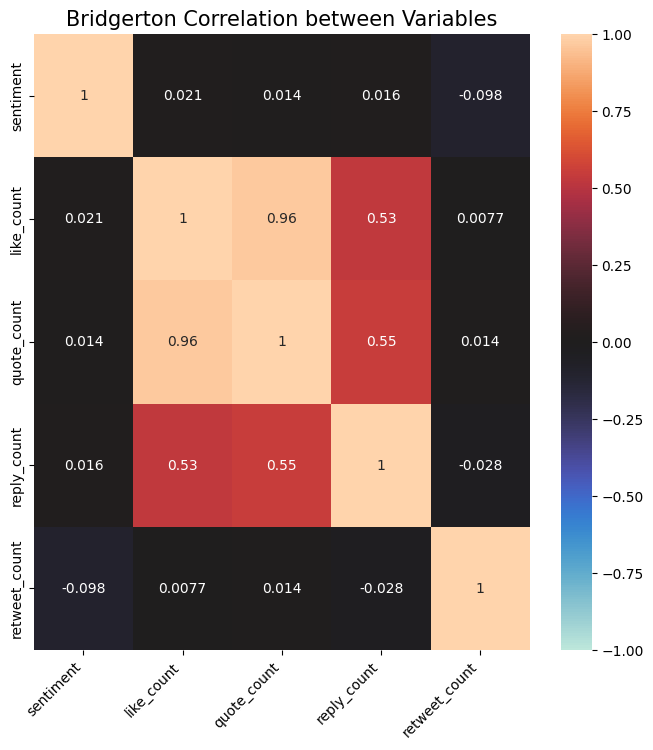

In [158]:
plt.figure(figsize=(8, 8))

corrMatrix = df_bridgerton_numb_sent.corr()
ax = sns.heatmap(corrMatrix, annot=True, vmin = -1, vmax = 1, center=0, cmap=sns.color_palette("icefire", as_cmap=True))
plt.title("Bridgerton Correlation between Variables", fontsize = 15)
ax.set_xticklabels( ax.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.show()

C:\Users\nicob\AppData\Local\Temp\ipykernel_12736\1086671356.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corrMatrix = df_inception_numb_sent.corr()


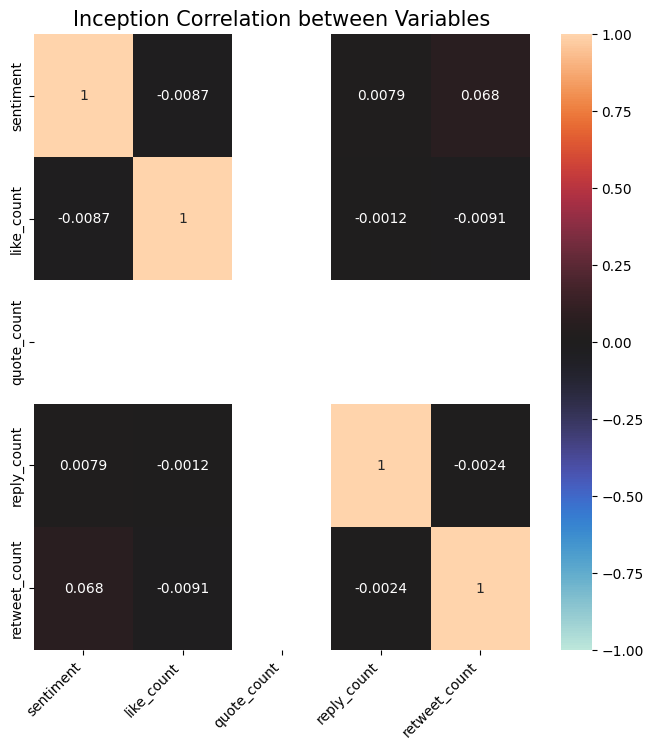

In [155]:
plt.figure(figsize=(8,8))

corrMatrix = df_inception_numb_sent.corr()
ax = sns.heatmap(corrMatrix, annot=True, vmin = -1, vmax = 1, center=0, cmap=sns.color_palette("icefire", as_cmap=True))
plt.title("Inception Correlation between Variables", fontsize = 15)
ax.set_xticklabels( ax.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.show()

C:\Users\nicob\AppData\Local\Temp\ipykernel_12736\3131611392.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corrMatrix = df_littlemermaid_numb_sent.corr()


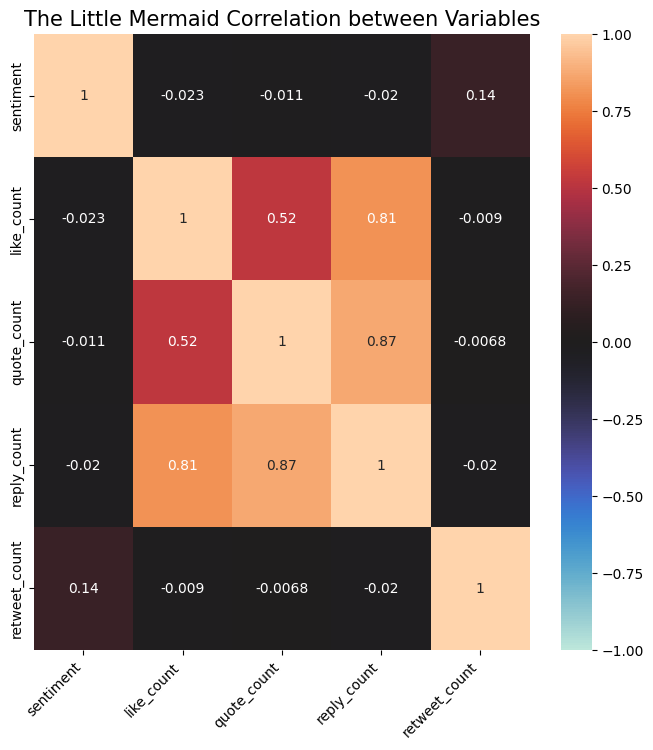

In [150]:
plt.figure(figsize=(8,8))

corrMatrix = df_littlemermaid_numb_sent.corr()
ax = sns.heatmap(corrMatrix, annot=True, vmin = -1, vmax = 1, center=0, cmap=sns.color_palette("icefire", as_cmap=True))
plt.title("The Little Mermaid Correlation between Variables", fontsize = 15)
ax.set_xticklabels( ax.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.show()

<AxesSubplot: xlabel='retweet_count', ylabel='sentiment'>

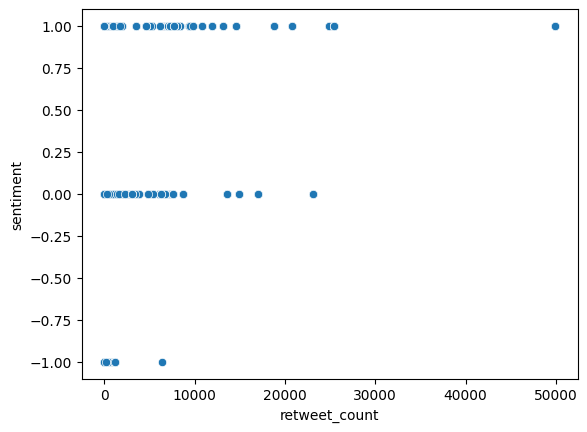

In [186]:
# Add Hue to add a third dimension as color
sns.scatterplot(y = "sentiment", x = "retweet_count", data=df_littlemermaid_numb_sent)

C:\Users\nicob\AppData\Local\Temp\ipykernel_12736\436254519.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corrMatrix = df_wallstreet_numb_sent.corr()


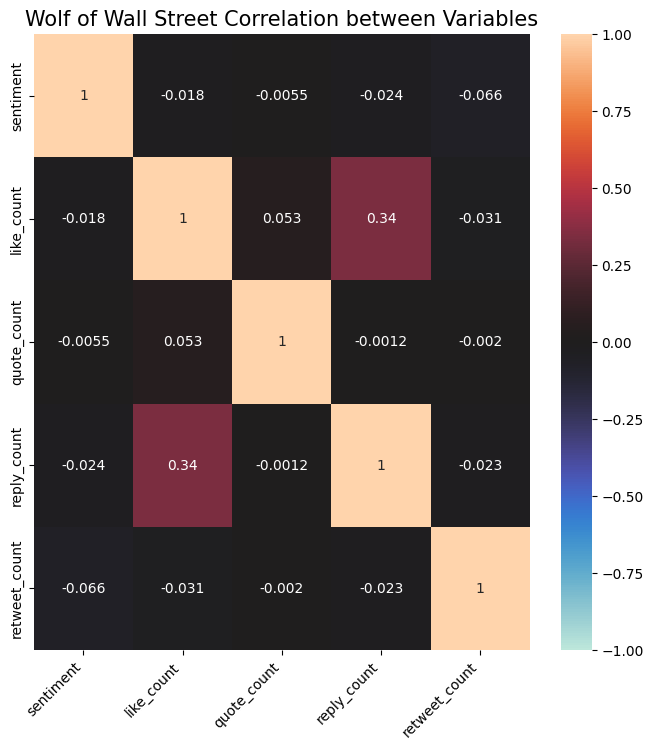

In [152]:
plt.figure(figsize=(8, 8))

corrMatrix = df_wallstreet_numb_sent.corr()
ax = sns.heatmap(corrMatrix, annot=True, vmin = -1, vmax = 1, center=0, cmap=sns.color_palette("icefire", as_cmap=True))
plt.title("Wolf of Wall Street Correlation between Variables", fontsize = 15)
ax.set_xticklabels( ax.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.show()

C:\Users\nicob\AppData\Local\Temp\ipykernel_12736\4076680442.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corrMatrix = df_witcher_numb_sent.corr()


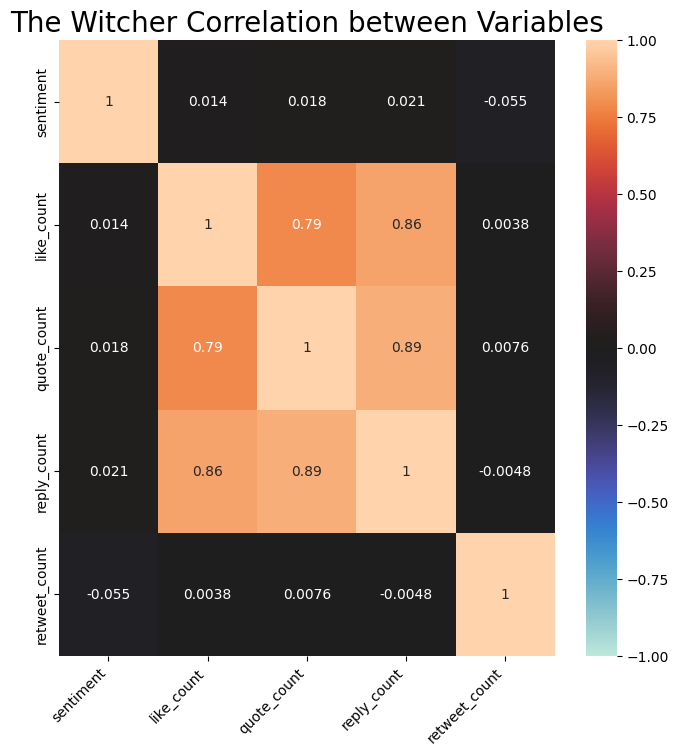

In [153]:
plt.figure(figsize=(8, 8))

corrMatrix = df_witcher_numb_sent.corr()
ax = sns.heatmap(corrMatrix, annot=True, vmin = -1, vmax = 1, center=0, cmap=sns.color_palette("icefire", as_cmap=True))
plt.title("The Witcher Correlation between Variables", fontsize = 20)
ax.set_xticklabels( ax.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.show()

C:\Users\nicob\AppData\Local\Temp\ipykernel_12736\3949338591.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corrMatrix = df_madmax_numb_sent.corr()


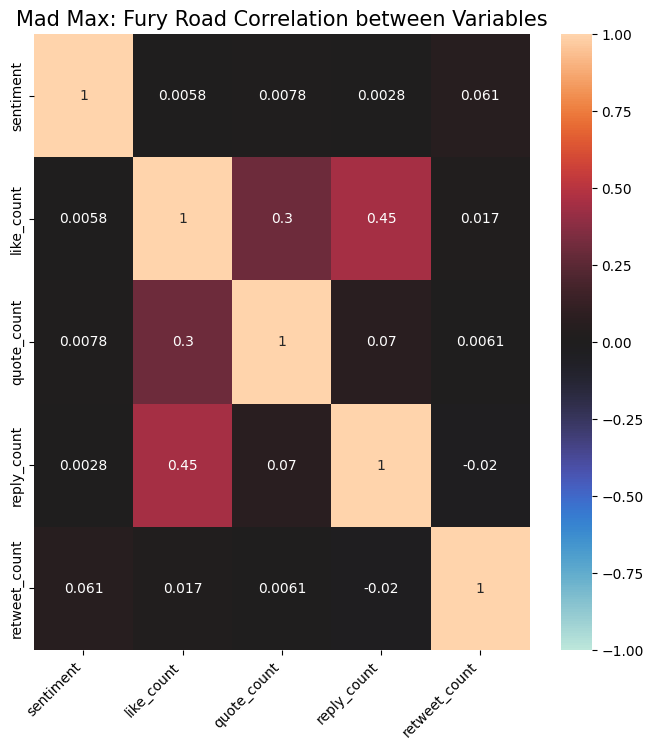

In [154]:
plt.figure(figsize=(8, 8))

corrMatrix = df_madmax_numb_sent.corr()
ax = sns.heatmap(corrMatrix, annot=True, vmin = -1, vmax = 1, center=0, cmap=sns.color_palette("icefire", as_cmap=True))
plt.title("Mad Max: Fury Road Correlation between Variables", fontsize = 15)
ax.set_xticklabels( ax.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.show()